## Shape file  -The shapefile format is a popular geospatial vector data format for geographic information system (GIS) software. 

https://en.wikipedia.org/wiki/Shapefile

<img src="esri.jpeg">

## Pandas - A NUMFocus-sponsered open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language

<img src="http://pandas.pydata.org/_static/pydata_cover.jpg" />

(http://pandas.pydata.org/)


## GeoPandas - add geographic support to Pandas objects

https://github.com/geopandas/geopandas

## Shapely - Python package for computational geometry
http://toblerity.org/shapely/manual.html

## MatPlotLib - statistical graphing library

<img src="matplotlib.jpg">
(http://matplotlib.org/)

In [34]:
import pandas as pd
import geopandas as gp
from shapely.geometry import Point
from ipywidgets import interact
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
states = gp.read_file('data/states.shp')

## GeoPandas has a special object type called "geometry" which can represent point, polygon or multi-polygon data

In [36]:
states.head()

,DRAWSEQ,STATE_ABBR,STATE_FIPS,STATE_NAME,SUB_REGION,geometry
0,1,HI,15,Hawaii,Pacific,(POLYGON ((-160.0738033454681 22.0041773479577...
1,2,WA,53,Washington,Pacific,(POLYGON ((-122.4020153103835 48.2252163723779...
2,3,MT,30,Montana,Mountain,POLYGON ((-111.4754253002074 44.70216236909688...
3,4,ME,23,Maine,New England,(POLYGON ((-69.77727626137293 44.0741483685119...
4,5,ND,38,North Dakota,West North Central,POLYGON ((-98.73043728833767 45.93827137024809...


## We can now use Panda's embedded use of the popular MatPlotLib library to plot our geo shapes

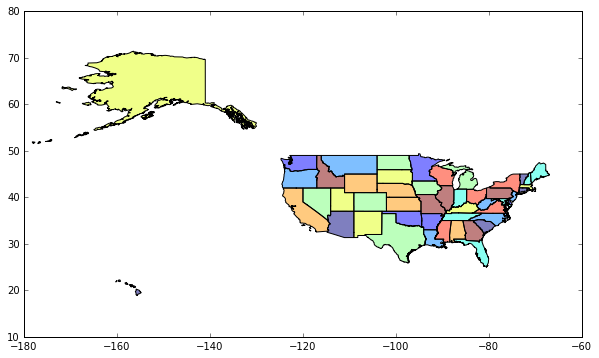

In [37]:
states.plot(figsize=(10,8))

## We can use simple filtering to manipulate the data/map we want

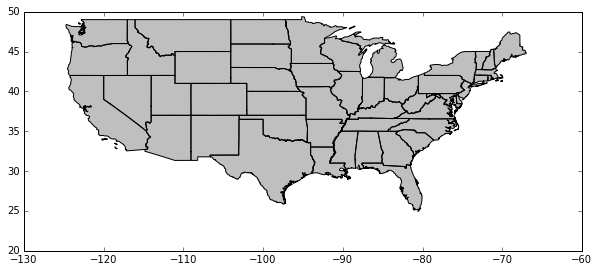

In [38]:
filter = states['STATE_ABBR'].isin(['HI', 'AK'])
lower48 = states[~filter]
lower48.plot(color='Grey', figsize=(10,8))

## ... and similarly use this filter method to get us a particular shape (state)

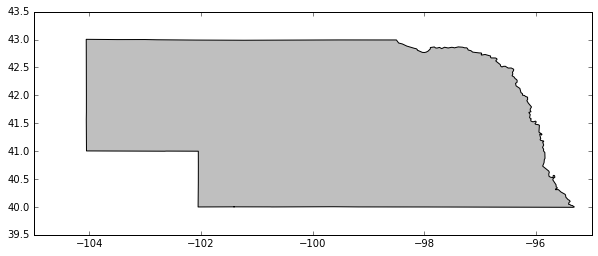

In [39]:
neb = states[states['STATE_ABBR'] == 'NE']
neb.plot(color='Grey', figsize=(10,8))

## Get some useful data...

http://www.nuforc.org/

In [40]:
ufo = pd.read_csv('data/ufo_sightings.csv')
ufo['Date'] = pd.to_datetime(ufo['Date'])
ufo.head()

,Date,City,State,Shape,Duration,Summary,Posted,Latitude,Longitude
0,2016-11-02 23:00:00,huntsville,al,Cigar,1 hour,Me and my friend saw to very bright space craf...,11/4/16,34.728790,-86.57316
1,2016-11-01 18:30:00,phil campbell,al,Light,3 minutes,Light in sky.,11/4/16,34.343017,-87.71277
2,2016-10-30 02:00:00,dothan,al,Circle,2:00-4:00,"White light mostly,blue and red lights strobin...",11/4/16,31.223230,-85.39049
3,2016-10-21 23:30:00,cullman,al,Formation,4 seconds,They moved west to east and covered the entire...,10/27/16,34.167893,-86.82506
4,2016-10-12 06:50:00,odenville,al,Light,10 seconds,It was a very bright white light moving very f...,10/13/16,33.677320,-86.39665


## Creating our geometry objects for use within a GeoPandas data frame

In [41]:
geometry = [Point(xy) for xy in zip(ufo['Longitude'], ufo['Latitude'])]
# geometry

## Adding the geometry object and creating a GeoPandas frame

In [42]:
ufo = gp.GeoDataFrame(ufo, geometry=geometry)
ufo.head()

,Date,City,State,Shape,Duration,Summary,Posted,Latitude,Longitude,geometry
0,2016-11-02 23:00:00,huntsville,al,Cigar,1 hour,Me and my friend saw to very bright space craf...,11/4/16,34.728790,-86.57316,POINT (-86.57316 34.72879)
1,2016-11-01 18:30:00,phil campbell,al,Light,3 minutes,Light in sky.,11/4/16,34.343017,-87.71277,POINT (-87.71276999999998 34.343017)
2,2016-10-30 02:00:00,dothan,al,Circle,2:00-4:00,"White light mostly,blue and red lights strobin...",11/4/16,31.223230,-85.39049,POINT (-85.39049 31.22323)
3,2016-10-21 23:30:00,cullman,al,Formation,4 seconds,They moved west to east and covered the entire...,10/27/16,34.167893,-86.82506,POINT (-86.82505999999999 34.167893)
4,2016-10-12 06:50:00,odenville,al,Light,10 seconds,It was a very bright white light moving very f...,10/13/16,33.677320,-86.39665,POINT (-86.39664999999999 33.67732)


In [ ]:
# ufo.to_csv('data/ufo_geometry.csv')

## Creating a slice just for Nebraska

In [43]:
ufo_ne = gp.GeoDataFrame(ufo[ufo['State'] == 'ne'])
ufo_ne.dropna(inplace=True)
# ufo_ne.drop(['Latitude', 'Longitude'], axis=1, inplace=True)

## And now plotting each UFO sighting over the state map

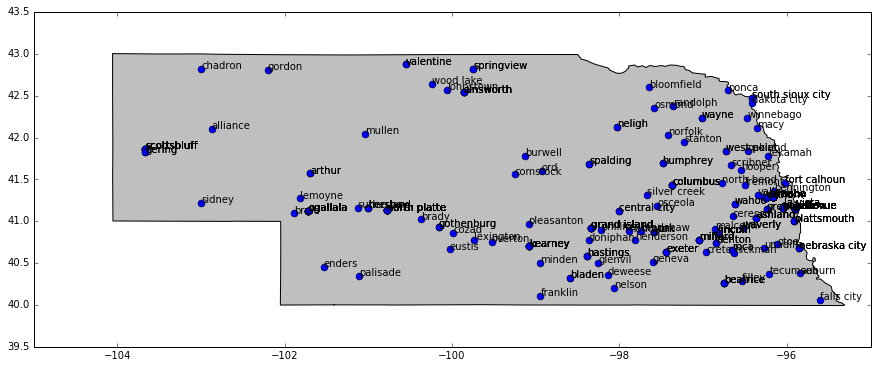

In [45]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_aspect('equal')
neb.plot(ax=ax, color='grey')
ufo_ne.plot(ax=ax, marker='o', color='blue', markersize=7)

for i, row in ufo_ne.iterrows():
    plt.annotate(s=row['City'], xy=(row['Longitude'], row['Latitude']))

plt.show()

In [46]:
shape_dict = {'Changing':'.',
'Chevron':',',
'Cigar':'o',
'Circle':'v',
'Cone':'^',
'Cross':'<',
'Cylinder':'>',
'Diamond':'1',
'Disk':'2',
'Egg':'3',
'Fireball':'4',
'Flash':'8',
'Formation':'s',
'Light':'p',
'Other':'*',
'Oval':'h',
'Rectangle':'H',
'Sphere':'+',
'Teardrop':'x',
'Triangle':'D',
'Unknown':'d'
}

In [47]:
ufo_ne['marker'] = ufo_ne['Shape']
ufo_ne.replace({"marker": shape_dict}, inplace=True)
ufo_ne.head()

,Date,City,State,Shape,Duration,Summary,Posted,Latitude,Longitude,geometry,marker
41815,2016-10-31 19:30:00,gretna,ne,Light,7 minutes,4 lights over Gretna NE,11/4/16,41.140830,-96.23974,POINT (-96.23974 41.14083),p
41816,2016-10-27 23:45:00,ashland,ne,Sphere,10 seconds,Watched a bright green glowing sphere travel a...,11/4/16,41.039160,-96.36835,POINT (-96.36835000000001 41.03916),+
41817,2016-10-08 20:10:00,bellevue,ne,Oval,~20 minutes,Four identical objects observed Near OAFB by t...,10/11/16,41.146848,-95.90796,POINT (-95.90796 41.146848),h
41818,2016-08-22 06:00:00,elkhorn,ne,Oval,7 minutes,Sphere not moving than vanished in seconds.,8/25/16,41.274881,-96.24565,POINT (-96.24565 41.274881),h
41819,2016-08-14 21:30:00,ogallala,ne,Triangle,>15 minutes,Spotted Triangle of lights above No Name Bay a...,8/16/16,41.128050,-101.71962,POINT (-101.71962 41.12805),D


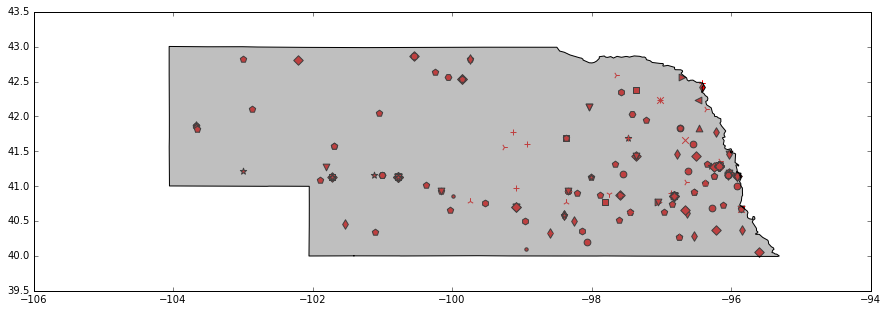

In [48]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_aspect('equal')
neb.plot(ax=ax, color='grey')

for i, row in ufo_ne.iterrows():
#     ufo_ne.plot(ax=ax, marker=row["marker"], color='blue', markersize=7)
    plt.scatter(row['Longitude'], row['Latitude'], c='r', marker=row['marker'], s=45)
plt.show()

In [49]:
def makeMap(yr):    
    fig, ax = plt.subplots(figsize=(15,10))
    ax.set_aspect('equal')
    neb.plot(ax=ax, color='grey')
    ufo_ne[ufo_ne.Date.dt.year == yr].plot(ax=ax, marker='o', color='blue', markersize=7)
    plt.show()

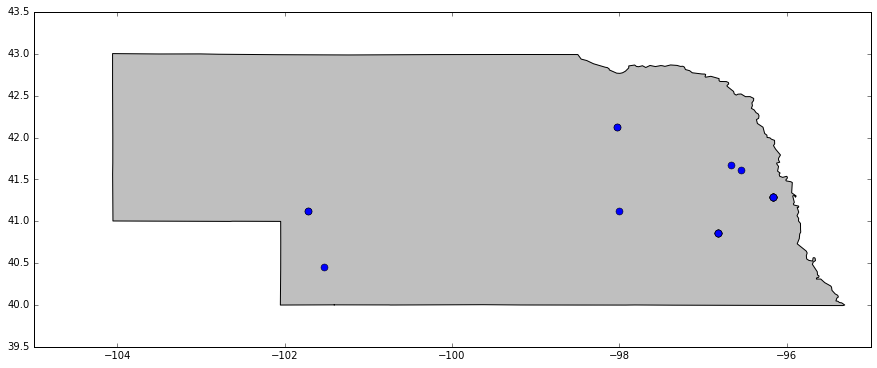

In [50]:
interact(makeMap, yr=(2000, 2016, 1))

In [51]:
ufo48 = ufo[~ufo['State'].isin(['ak', 'hi'])]


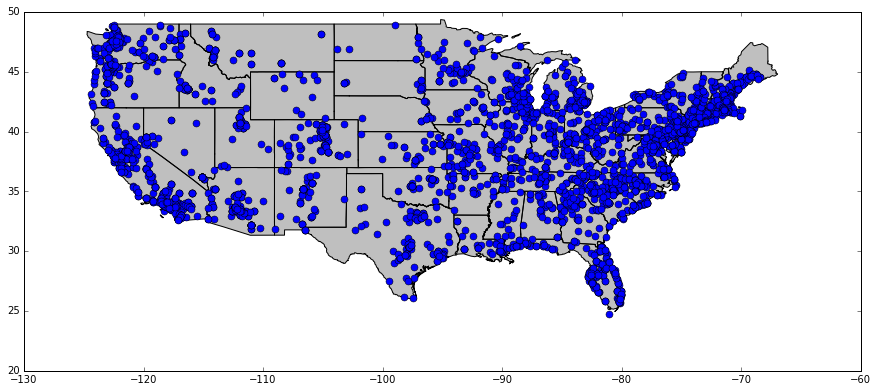

In [52]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_aspect('equal')
lower48.plot(ax=ax, color='grey')
ufo48[(ufo48.Date.dt.year == 2016)].plot(ax=ax, marker='o', color='blue', markersize=7)
plt.show()

In [53]:
ufo['State'] = ufo['State'].str.upper()

In [54]:
ufo_counts = pd.DataFrame(ufo.groupby('State').size()).reset_index()
ufo_counts.columns = ['State', 'ufo_count']
ufo_counts.head()

,State,ufo_count
0,AK,496
1,AL,966
2,AR,846
3,AZ,3638
4,CA,12433


In [55]:
z = gp.GeoDataFrame(pd.merge(ufo_counts, lower48, left_on='State', right_on='STATE_ABBR'))
z.head()

,State,ufo_count,DRAWSEQ,STATE_ABBR,STATE_FIPS,STATE_NAME,SUB_REGION,geometry
0,AL,966,43,AL,01,Alabama,East South Central,POLYGON ((-85.07006727561546 31.98070335724909...
1,AR,846,47,AR,05,Arkansas,West South Central,POLYGON ((-94.46169128436209 34.19676535931296...
2,AZ,3638,37,AZ,04,Arizona,Mountain,POLYGON ((-114.5206273030434 33.02770735822419...
3,CA,12433,25,CA,06,California,Pacific,(POLYGON ((-121.6652203096974 38.1692853630126...
4,CO,2174,32,CO,08,Colorado,Mountain,POLYGON ((-102.0444562914241 37.64147436252109...


In [56]:
vmin=z['ufo_count'].min()
vmax=z['ufo_count'].max()
print(vmin, vmax)

130 12433


In [57]:
from matplotlib import cm

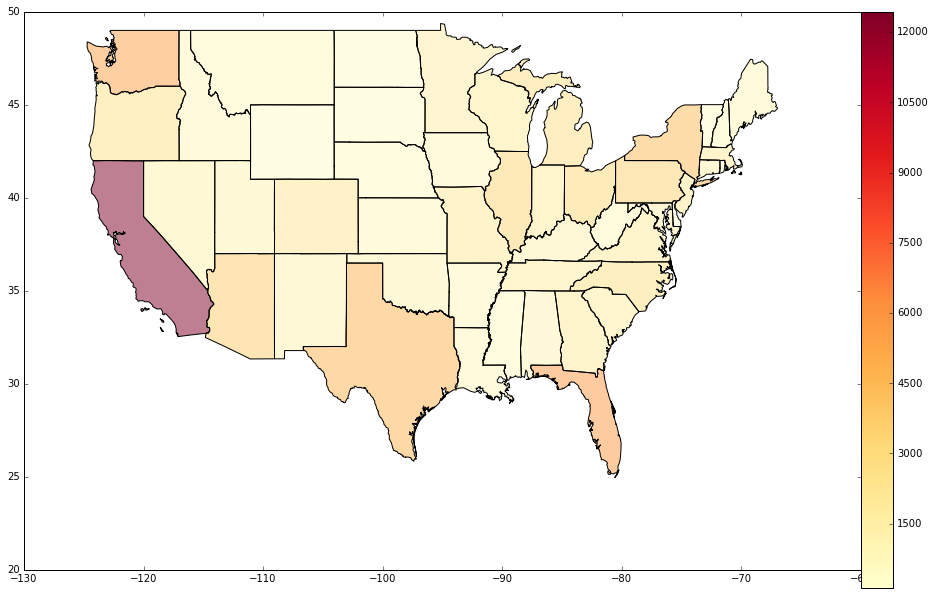

In [67]:
# Blues
# YlOrRd
fig, ax = plt.subplots(figsize=(15,10))

z.plot(ax=ax, column='ufo_count', cmap=cm.YlOrRd, vmin=vmin, vmax=vmax)

fig = ax.get_figure()
cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
sm = plt.cm.ScalarMappable(cmap="YlOrRd", norm=plt.Normalize(vmin=vmin, vmax=vmax))

sm._A = []
fig.colorbar(sm, cax=cax)

plt.show()